<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/8%20Artificial%20Neural%20Network/ANNwithOpenCVonMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks - Multi-Layer Perceptrons with OpenCV
# with MNIST Handwritting Digits

OpenCV provides the artificial neural networks (ANN-MLP), which is very similar to that of Keras.

https://www.secn.net/article/684929  opencv(python)使用ann神经网络识别手写数字


https://medium.com/@prtk13061992/mnist-dataset-using-deep-learning-algorithm-ann-c6f83aa594f5

In [1]:
from keras.datasets import mnist
from keras import utils
import numpy as np
import matplotlib.pyplot as plt
import cv2
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
def show_random_digits(X, Y, row, col):
    print("The true label is shown in green.")
    _, axarr = plt.subplots(row, col, figsize=(6, 6))
    for i in range(row):
        filter = np.where((Y == i))
        X1, Y1 = X[filter], Y[filter]
        for j in range(col):
            index = np.random.randint(X1.shape[0])
            axarr[i, j].imshow(X1[index], cmap="binary")
            axarr[i, j].axis('off')
            axarr[i, j].text(0.5, 1, str(Y1[index]), fontsize=12, c='g')
    plt.show()

In [3]:
def show_random_result(X, Y, row, col, pred):
    print("The true label is shown in green, and the predicted value is shown within [] in red.")
    _, axarr = plt.subplots(row, col, figsize=(6, 6))
    for i in range(row):
        for j in range(col):
            index = np.random.randint(X.shape[0])
            axarr[i, j].imshow(X[index], cmap="binary")
            axarr[i, j].axis('off')
            axarr[i, j].text(0.5, 1, str(Y[index]), fontsize=12, c='g')
            axarr[i, j].text(10,  1, str(pred[index]), fontsize=12, c='r')
    plt.show()

In [ ]:
def create_ANN():
    ann=cv2.ml.ANN_MLP_create()
    #设置神经网络层的结构 输入层为784 隐藏层为80 输出层为10
    ann.setLayerSizes(np.array([784,64,10]))
    #设置网络参数为误差反向传播法
    ann.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
    #设置激活函数为sigmoid
    ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM)
    #设置训练迭代条件
    #结束条件为训练30次或者误差小于0.00001
    ann.setTermCriteria((cv2.TermCriteria_EPS|cv2.TermCriteria_COUNT,100,0.0001))
    return ann

In [ ]:
#计算测试数据上的识别率
def evaluate_acc(ann,test_images,test_labels):
    #采用的sigmoid激活函数，需要对结果进行置信度处理
    #对于大于0.99的可以确定为1 对于小于0.01的可以确信为0
    test_ret=ann.predict(test_images)
    #预测结果是一个元组
    test_pre=test_ret[1]
    #可以直接最大值的下标 (10000,)
    test_pre=test_pre.argmax(axis=1)
    true_sum=(test_pre==test_labels)
    return true_sum.mean()

## Load MNIST Dataset

11493376/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)
The true label is shown in green.


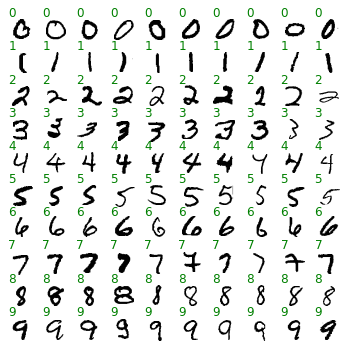

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))
show_random_digits(X_train, y_train, 10, 10)

In [ ]:
w, h = X_test[0,:,:].shape
X_train = X_train.reshape(X_train.shape[0], w * h).astype(np.float32)
X_test  = X_test.reshape(  X_test.shape[0], w * h).astype(np.float32)
X_train = X_train / 255
X_test  = X_test / 255
y_train_onehot = utils.to_categorical(y_train)
y_train_onehot = np.float32(y_train_onehot)
y_test  = np.uint(y_test)
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))
print('y_train_onehot:  ' + str(y_train_onehot.shape))

X_train: (60000, 784)
y_train: (60000,)
X_test:  (10000, 784)
y_test:  (10000,)


In [7]:
print(y_train[0:10])
print(train_y_train_onehotlabels[0:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[5 0 4 1 9 2 1 3 1 4]


In [ ]:
#变换数据的形状并归一化
train_images=train_images.reshape(train_images.shape[0],-1)#(60000, 784)
train_images=train_images.astype('float32')/255
test_images=test_images.reshape(test_images.shape[0],-1)
test_images=test_images.astype('float32')/255
#将标签变为one-hot形状 (60000, 10) float32
train_labels=utils.to_categorical(train_labels)
#测试数据标签不用变为one-hot (10000,)
test_labels=test_labels.astype(np.int)

In [ ]:
#定义神经网络模型结构
ann=create_ANN()
#开始训练
ann.train(X_train, cv2.ml.ROW_SAMPLE, y_train_onehot)


In [ ]:
#在测试数据上测试准确率
print(evaluate_acc(ann,test_images,test_labels))


In [ ]:
#保存模型
ann.save('mnist_ann.xml')


In [ ]:
#加载模型
myann=cv2.ml.ANN_MLP_load('mnist_ann.xml')

In [ ]:
#采用的sigmoid激活函数，需要对结果进行置信度处理
#对于大于0.99的可以确定为1 对于小于0.01的可以确信为0
test_ret=ann.predict(test_images)
#预测结果是一个元组
test_pre=test_ret[1]



In [ ]:
#可以直接最大值的下标 (10000,)
test_pre=test_pre.argmax(axis=1)
true_sum=(test_pre==test_labels)